In [1]:
import sys, os, glob
sys.path.append('../')

import tensorflow as tf

from MRIsegm.metrics import dice_coef
from MRIsegm.losses import DiceBCEloss, dice_loss
from MRIsegm.datagenerators import DataGenerator
from MRIsegm.graphics import show_multiple_predictions, show_multiple_overlap

from segmentation_models.losses import DiceLoss, BinaryFocalLoss

Segmentation Models: using `keras` framework.


In [2]:
SEED = 666

BATCH = 4
IMAGE_HEIGHT = 512
IMAGE_WIDTH =  512
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

source_path = '../data/imgs'
label_path = '../data/labels'

models_dir = '../data/models'
models_path = glob.glob(models_dir + '/*.h5')

dice_loss = DiceLoss()
focal_loss = BinaryFocalLoss()
loss = dice_loss + (1 * focal_loss)

dependencies = {
    'DiceBCEloss': DiceBCEloss,
    'dice_coef': dice_coef,
    'FixedDropout': tf.keras.layers.Dropout(0.2),
    'dice_loss': dice_loss,
    'dice_loss_plus_1binary_focal_loss': loss

}

keys = [ os.path.splitext(os.path.split(models_path[i])[1])[0] for i, mod in enumerate(models_path)]
values = [ tf.keras.models.load_model(models_path[i], custom_objects=dependencies) for i, mod in enumerate(models_path)]



models = dict(zip(keys, values))

In [3]:
Generator = DataGenerator(batch_size=BATCH, 
                                source_path=source_path, 
                                label_path=label_path,
                                seed=SEED, aug=False,
                                validation_split=0.2, subset='training'
                               )
Generator_validation = DataGenerator(batch_size=BATCH, 
                                source_path=source_path, 
                                label_path=label_path,
                                seed=SEED, aug=False,
                                validation_split=0.2, subset='validation'
                               )


In [4]:
import matplotlib.pyplot as plt 

plt.style.use('default')

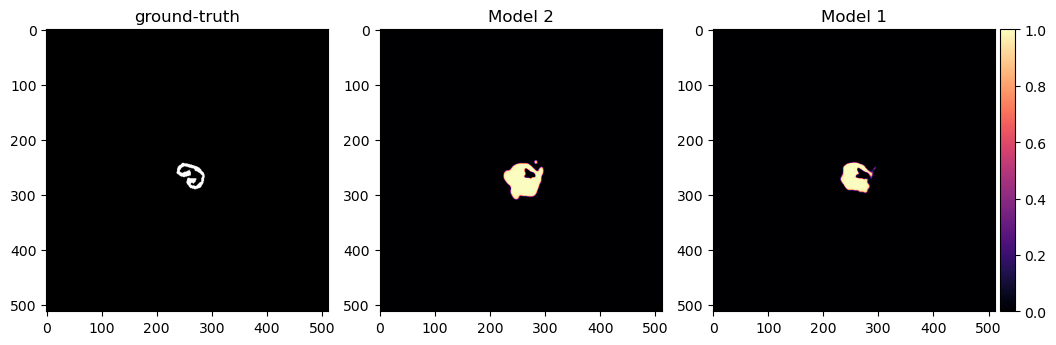

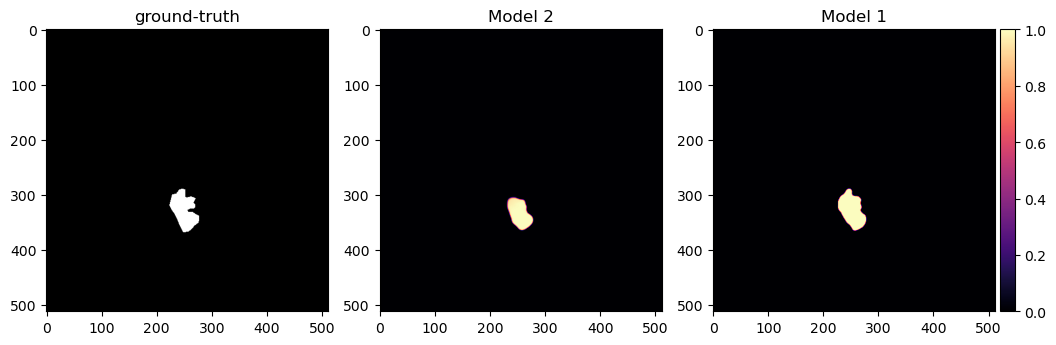

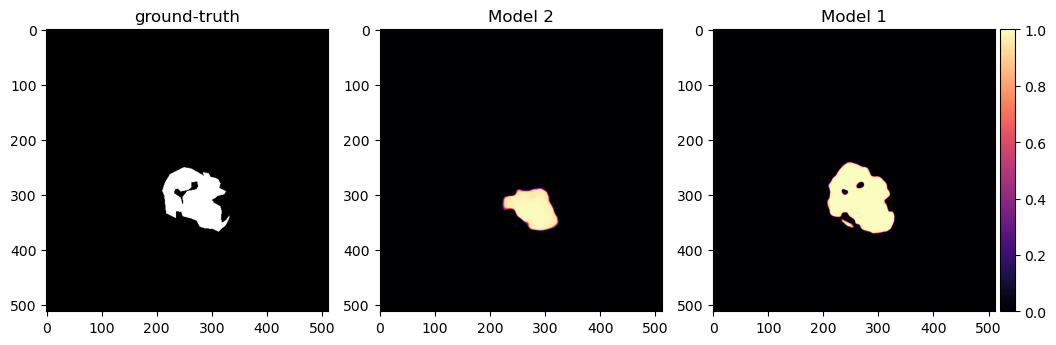

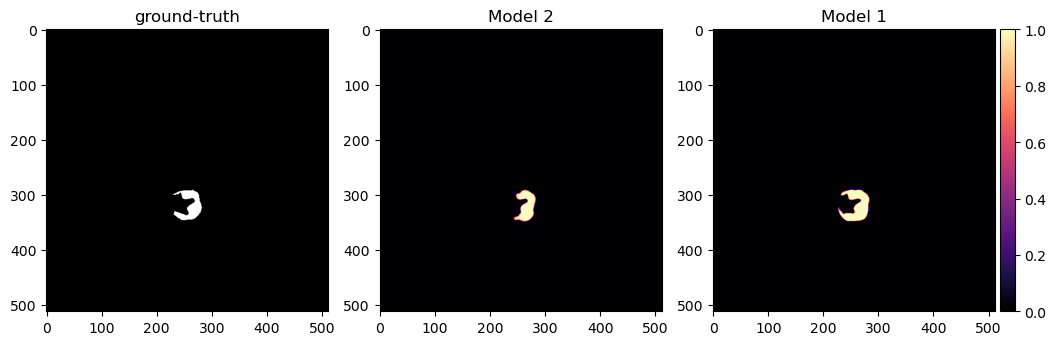

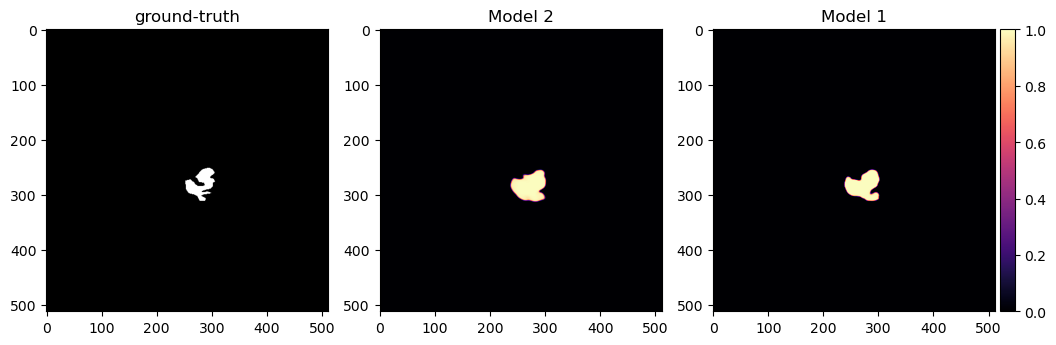

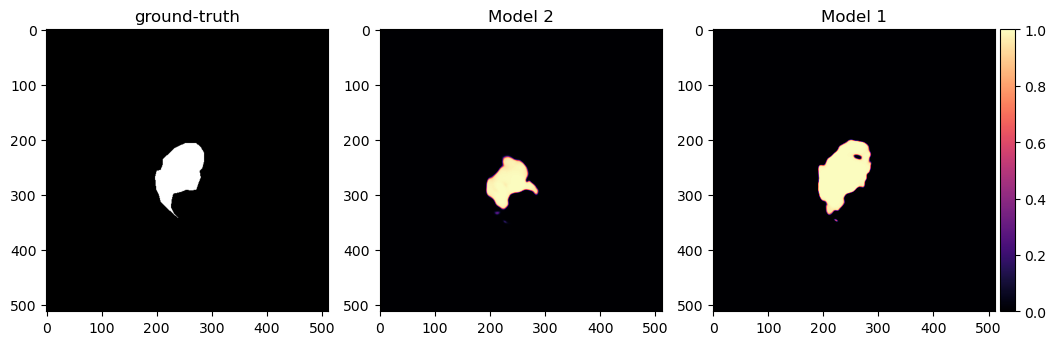

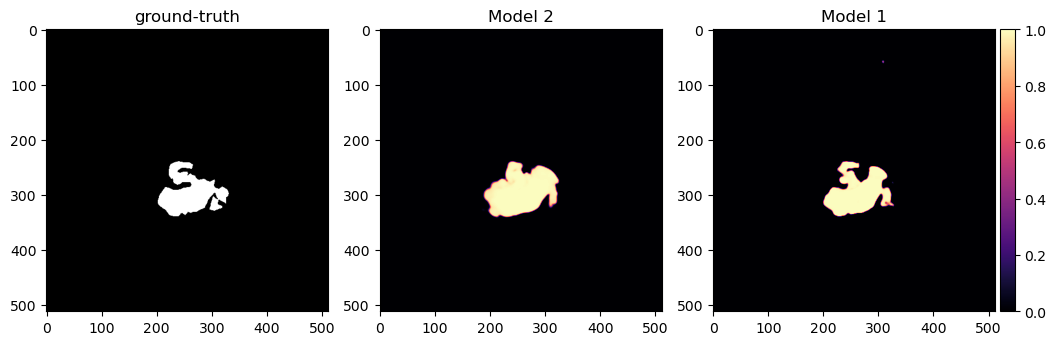

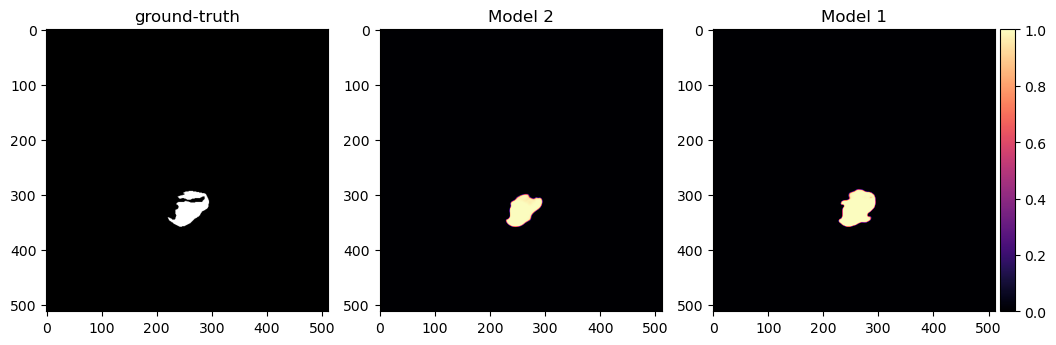

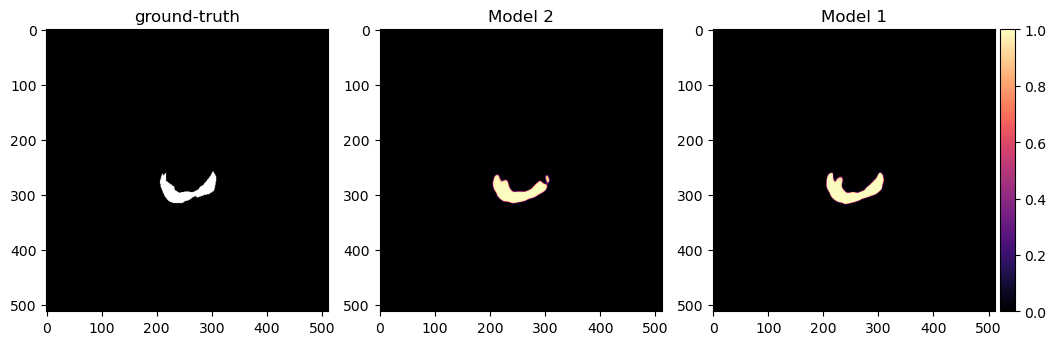

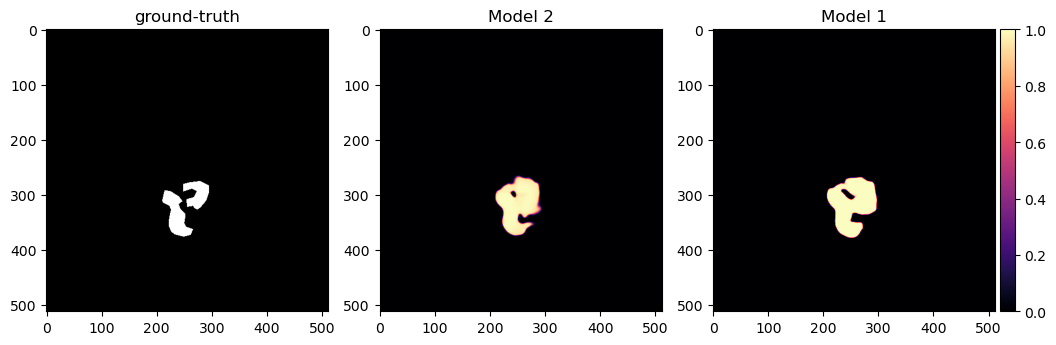

In [6]:

keys = ['Model 2', 'Model 1']
show_multiple_predictions(Generator, keys, values, 10, cmap='magma', figsize=(10,10))

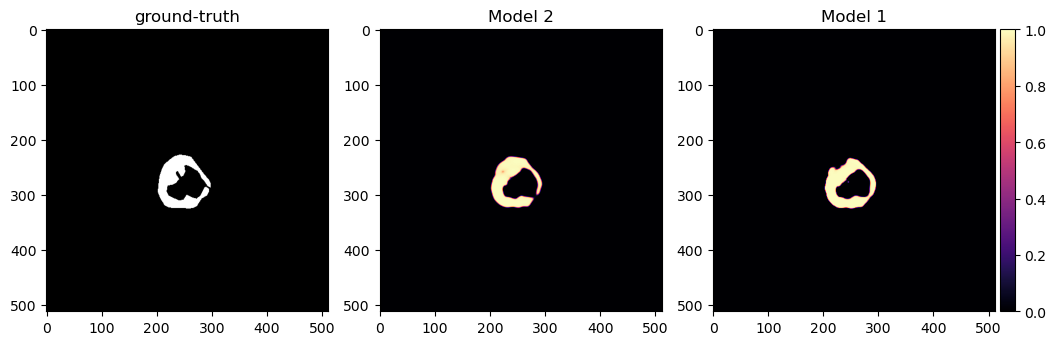

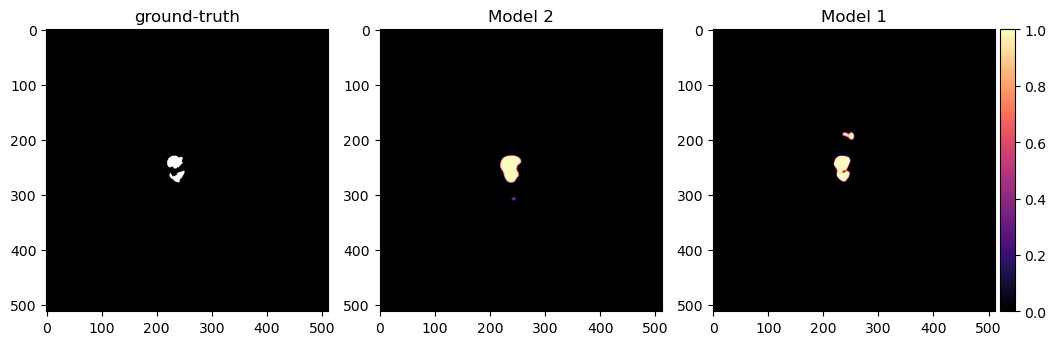

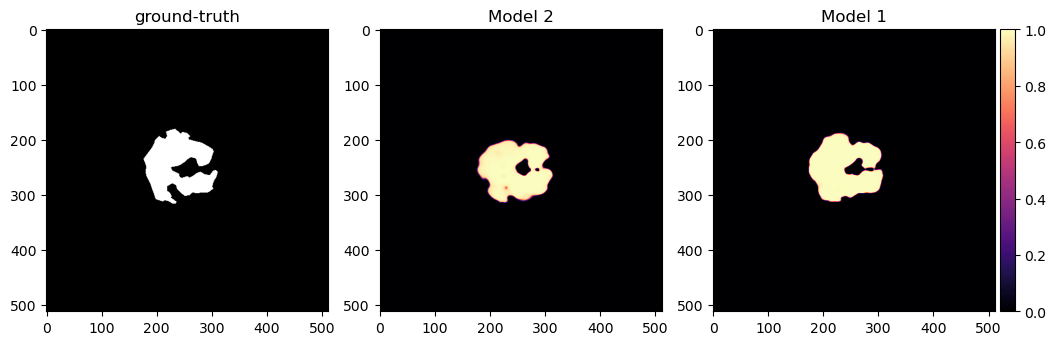

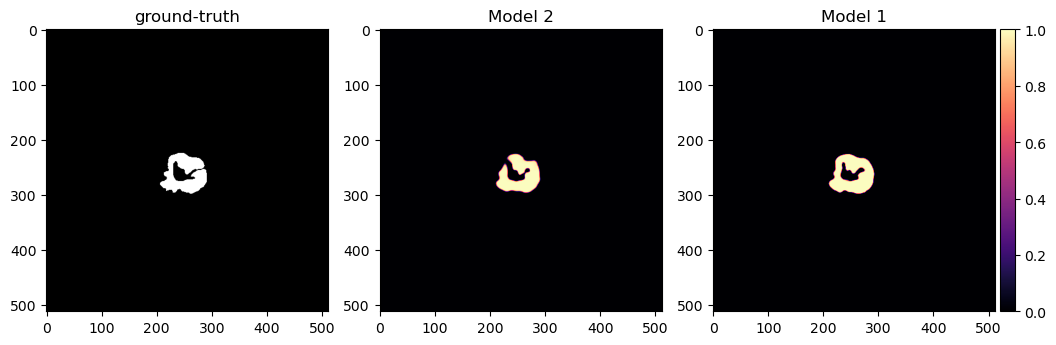

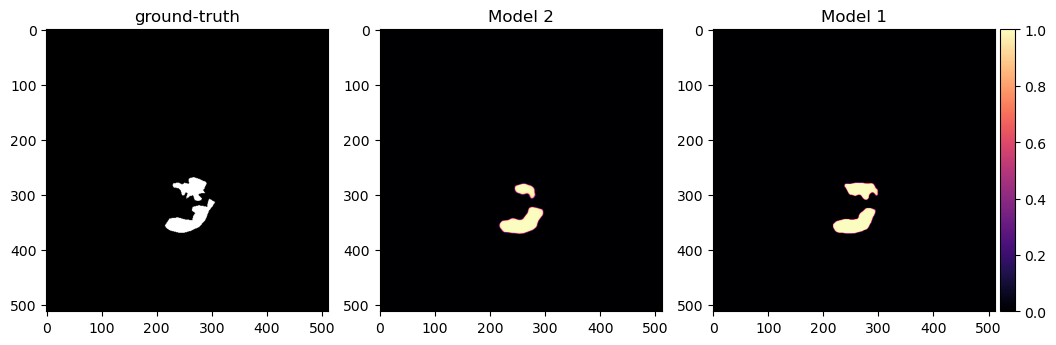

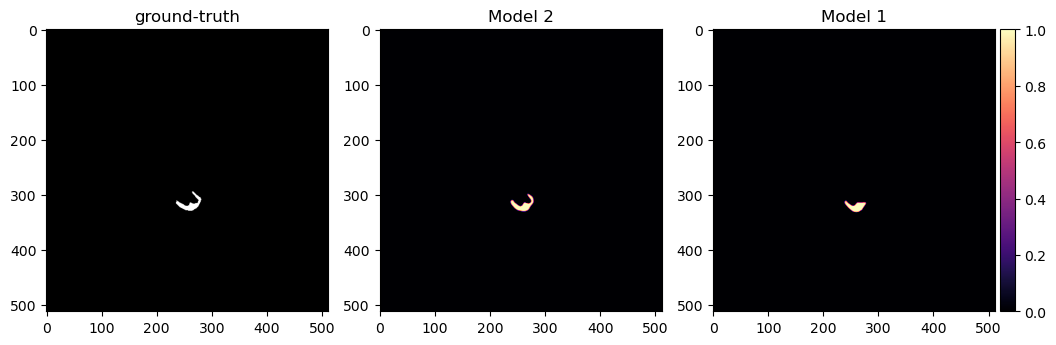

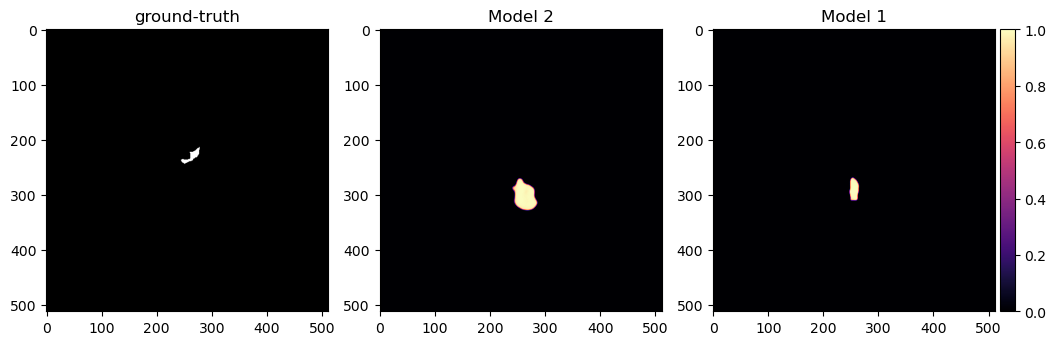

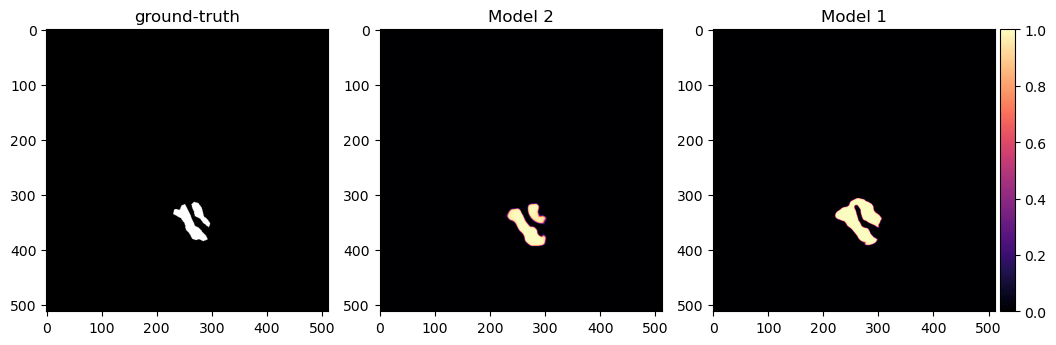

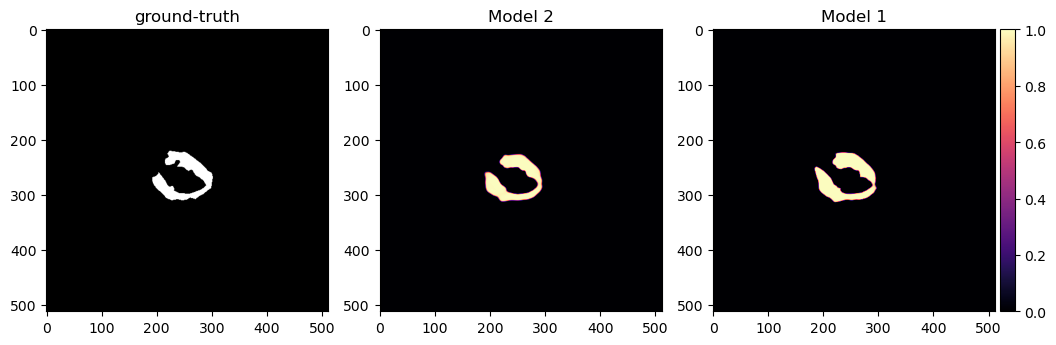

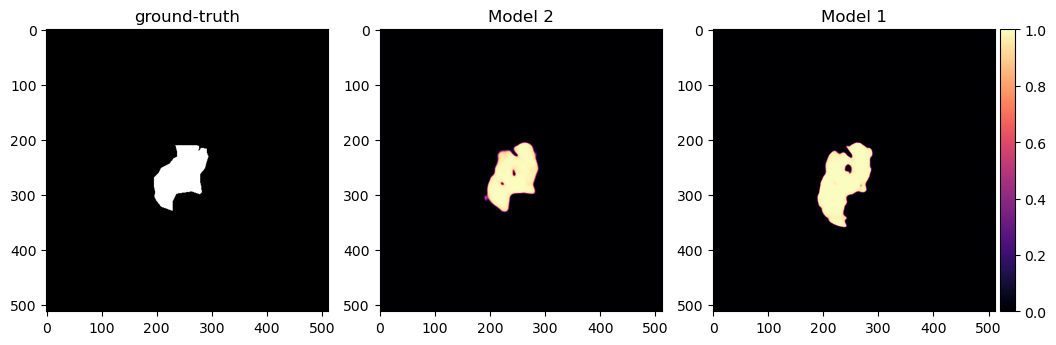

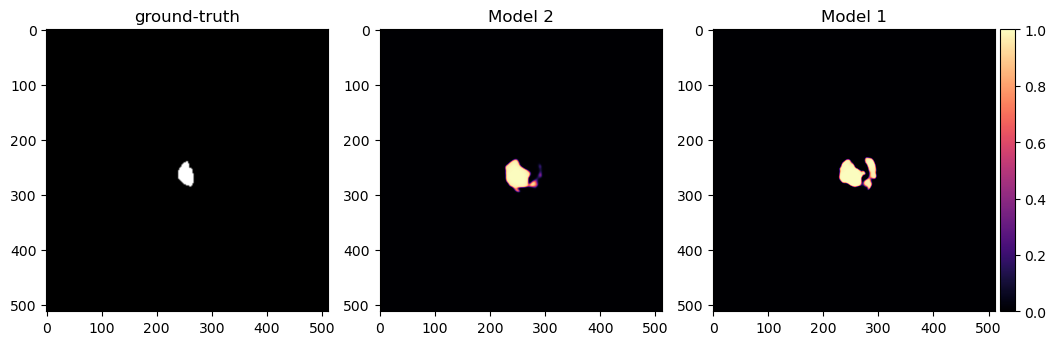

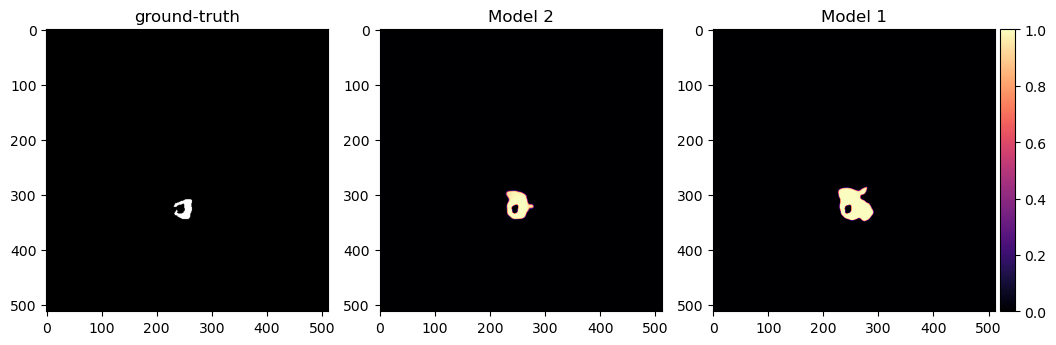

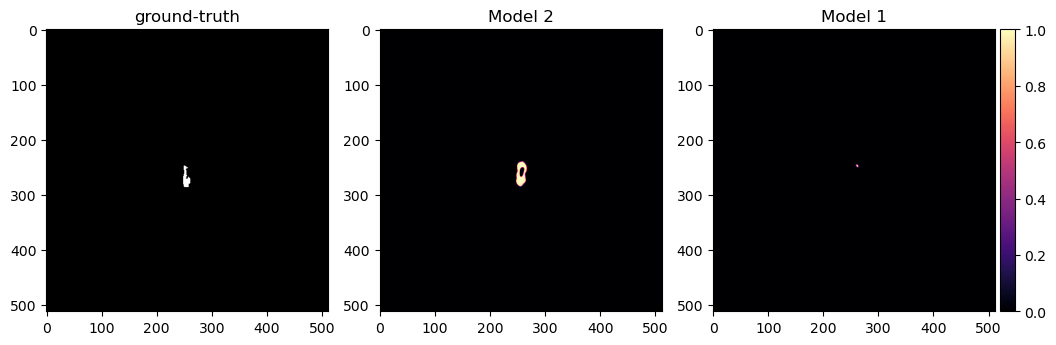

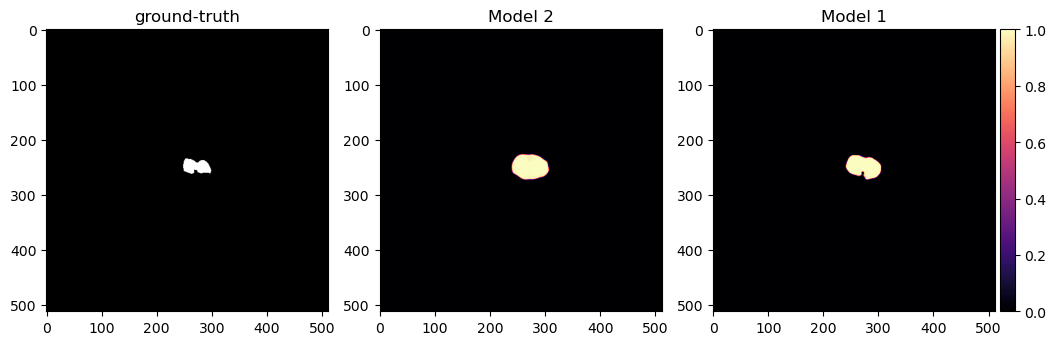

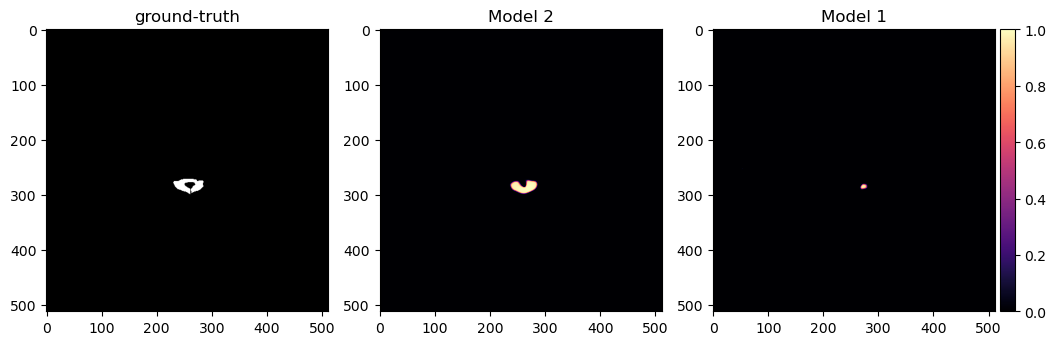

In [10]:
show_multiple_predictions(Generator_validation, keys, values, 15, cmap='magma', figsize=(10,10))

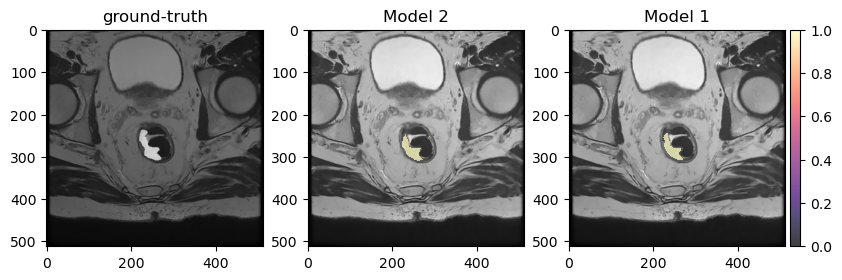

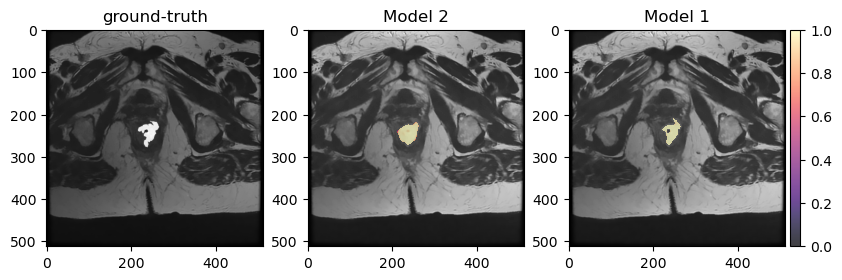

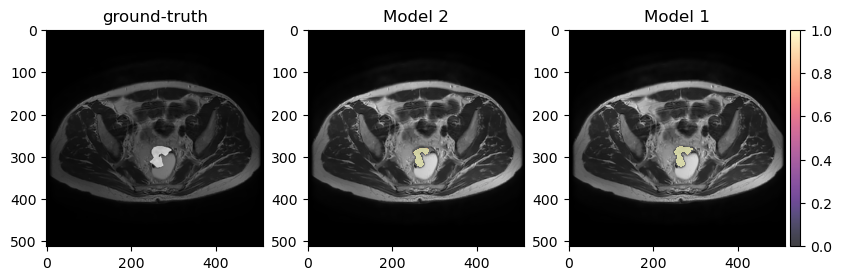

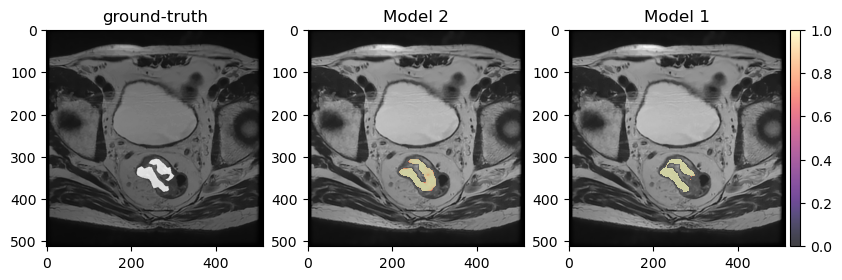

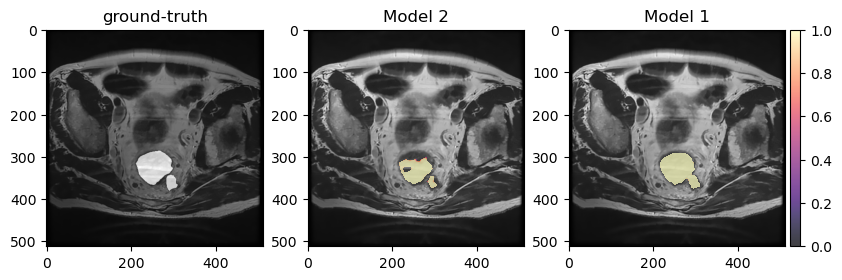

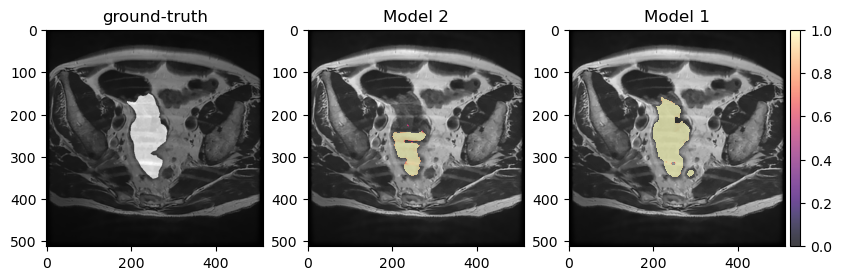

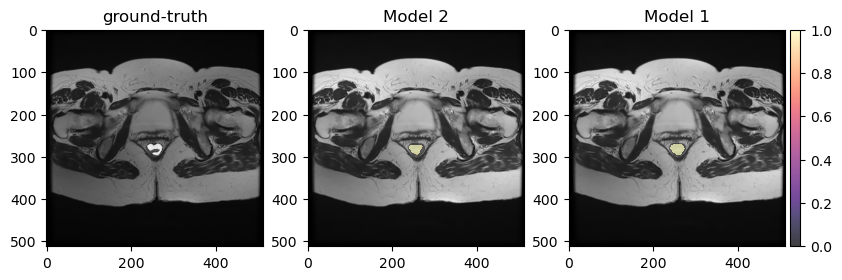

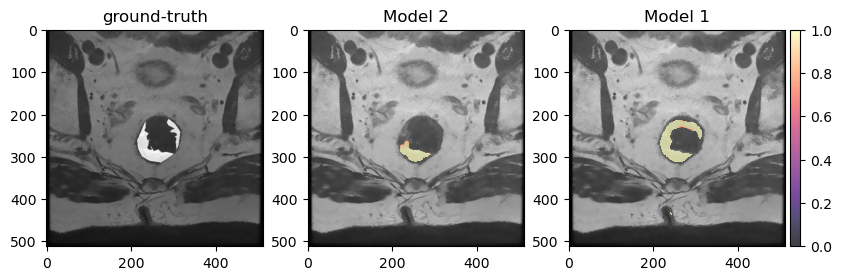

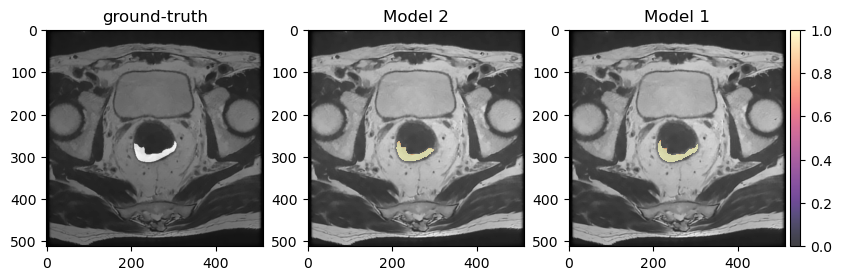

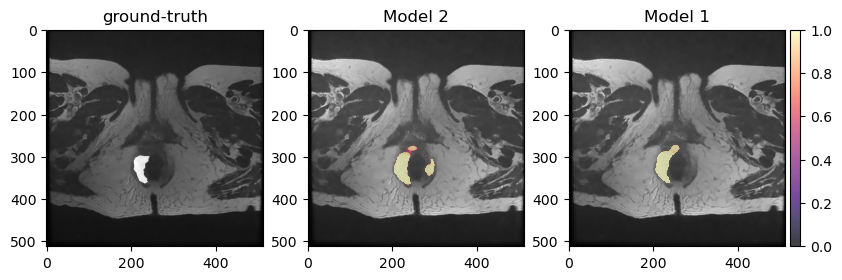

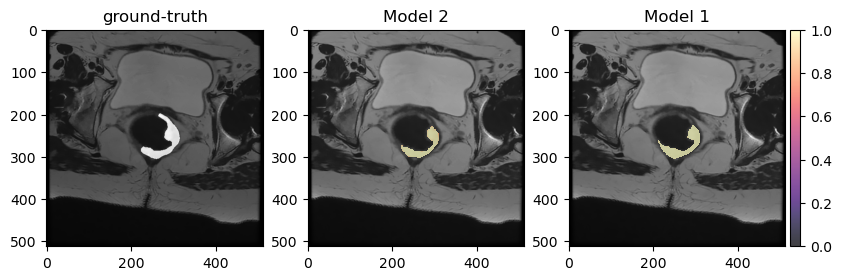

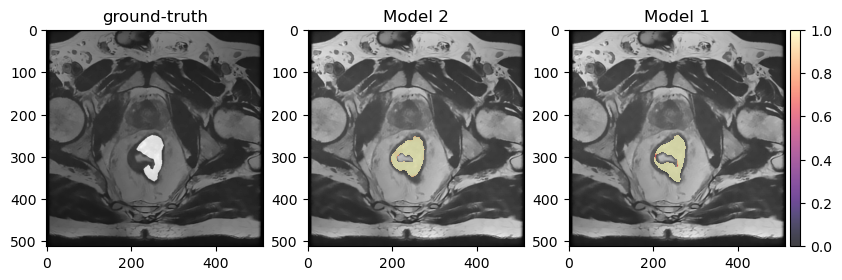

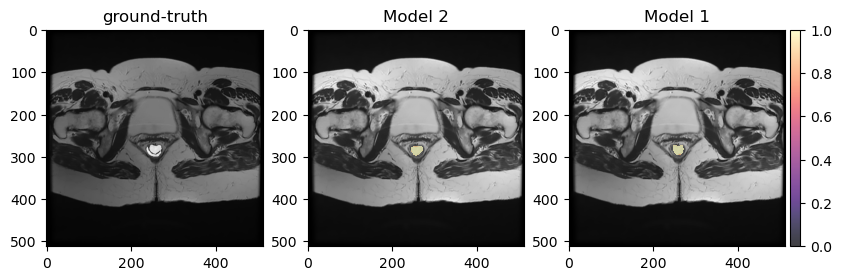

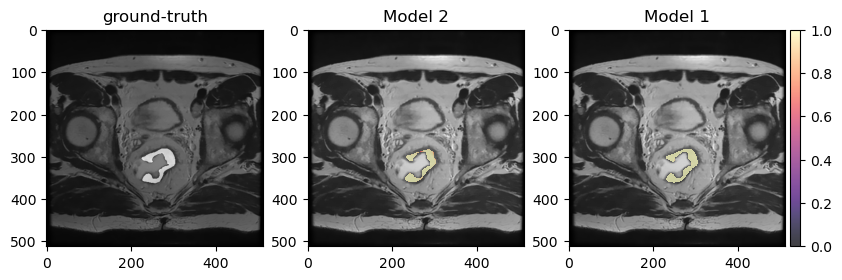

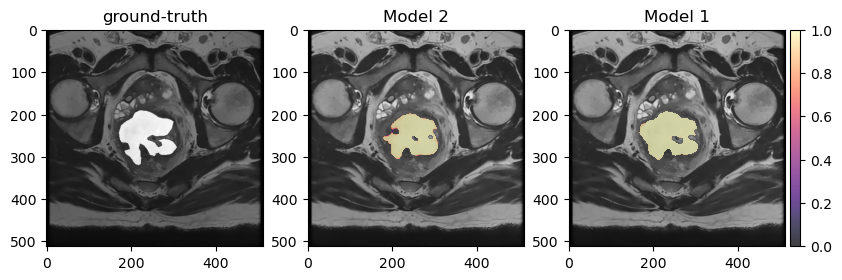

In [8]:
show_multiple_overlap(Generator, keys, values, 15, cmap='magma', figsize=(10,10))

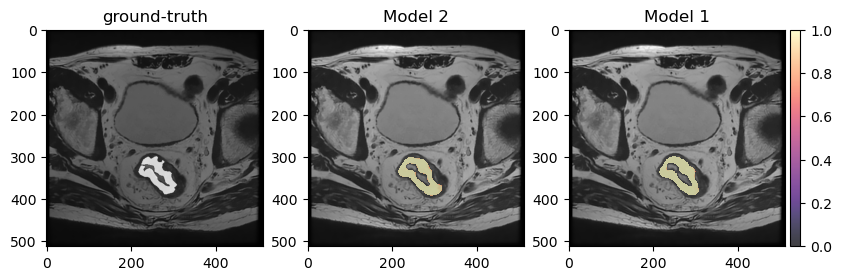

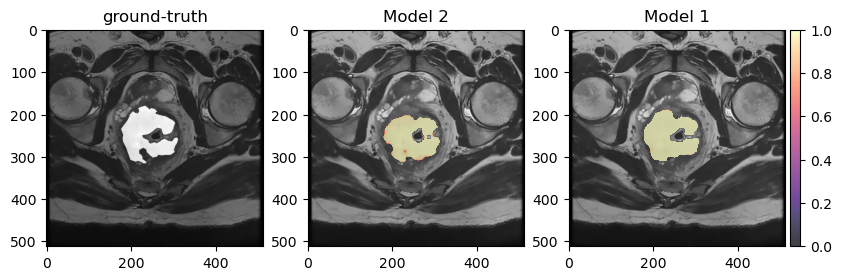

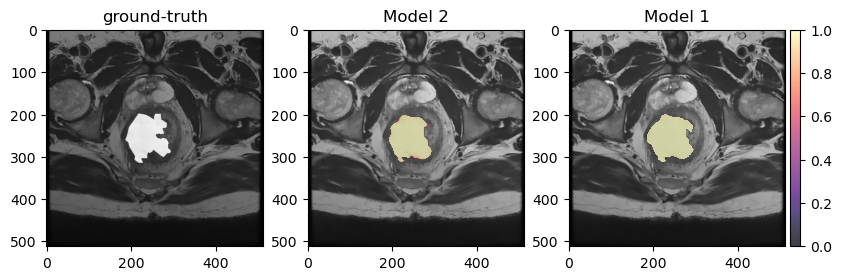

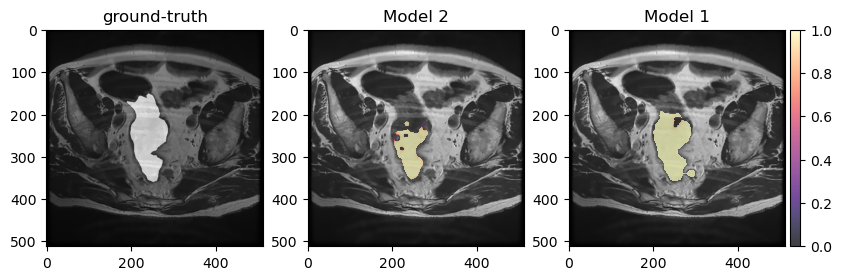

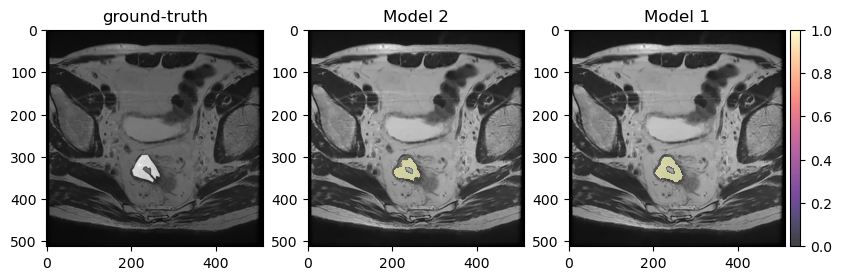

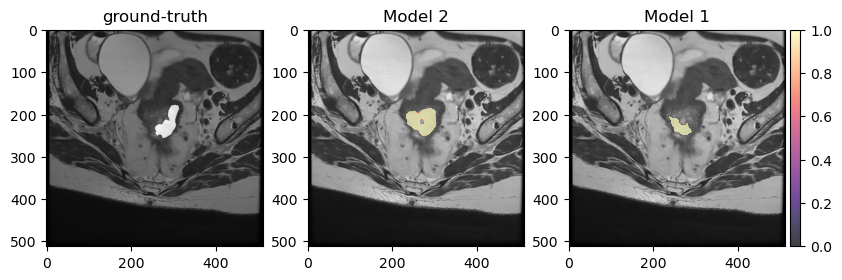

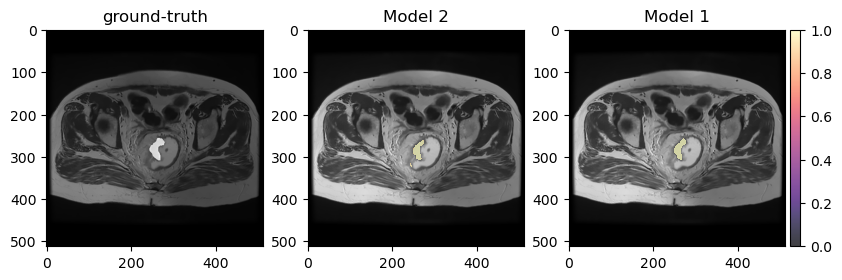

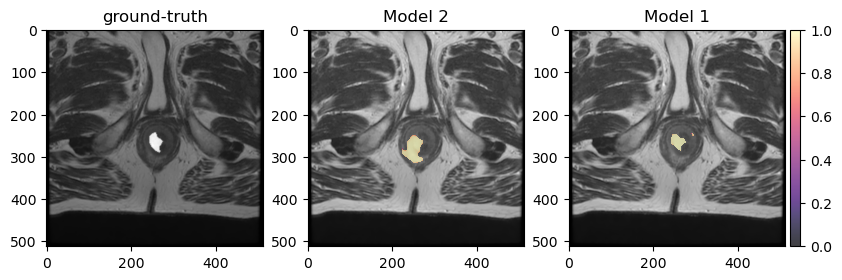

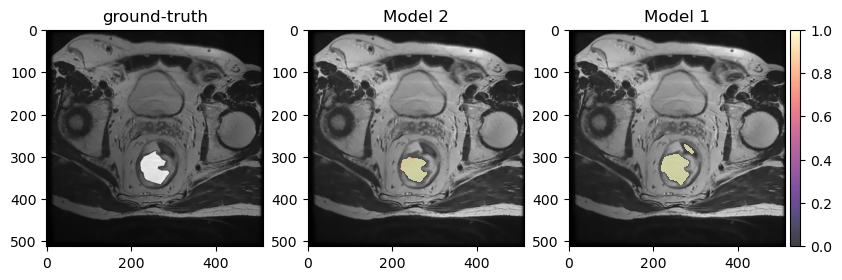

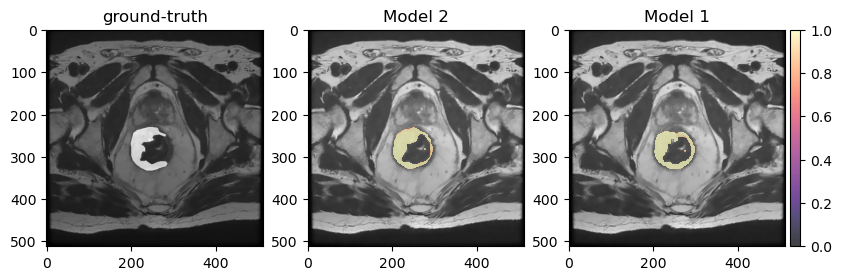

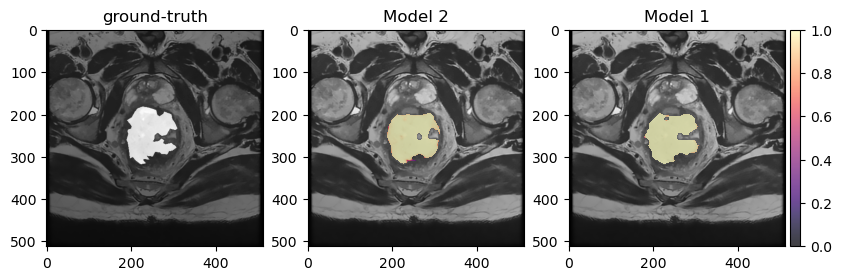

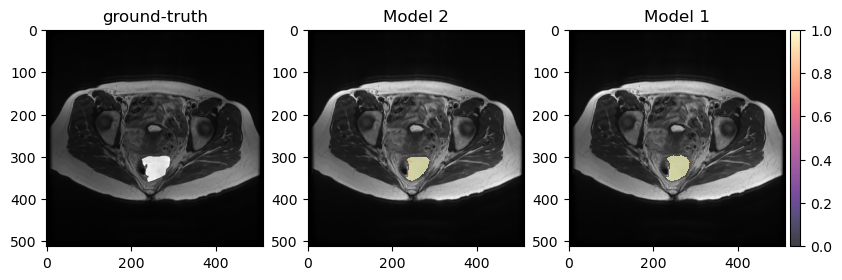

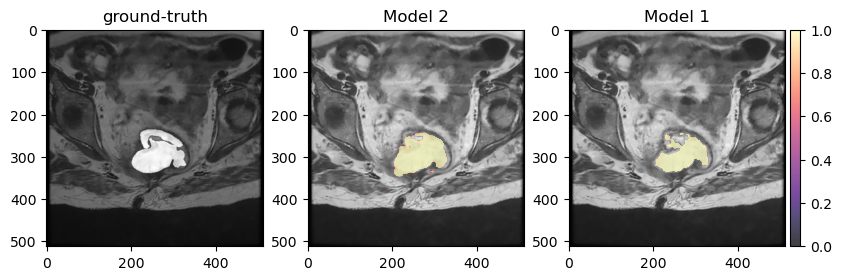

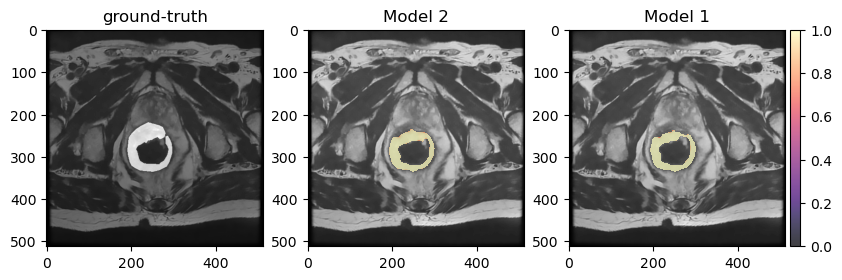

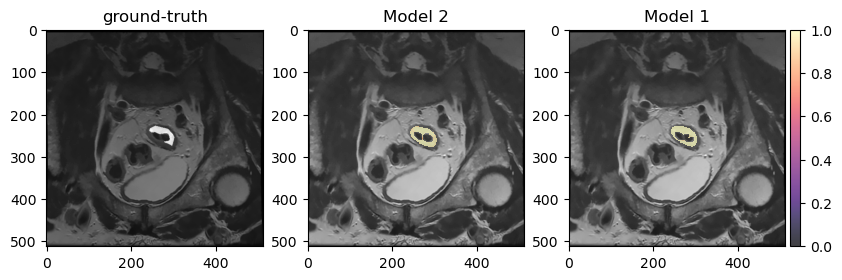

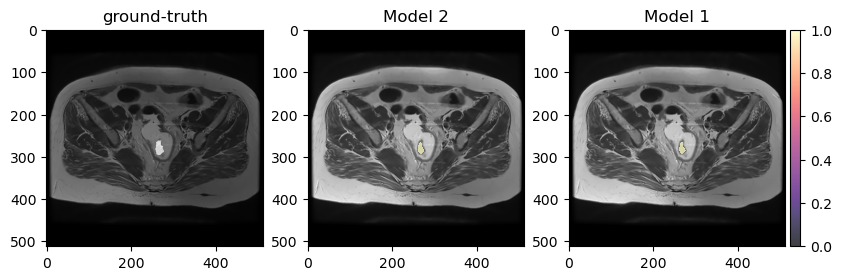

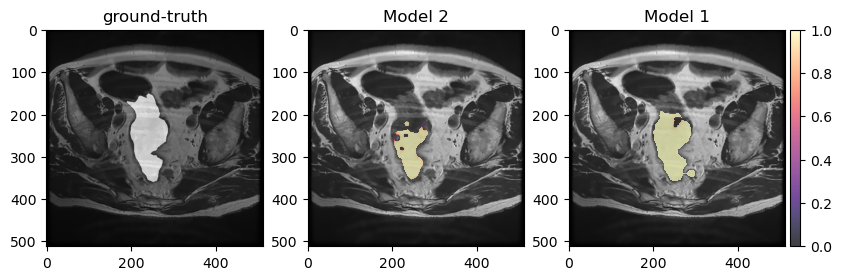

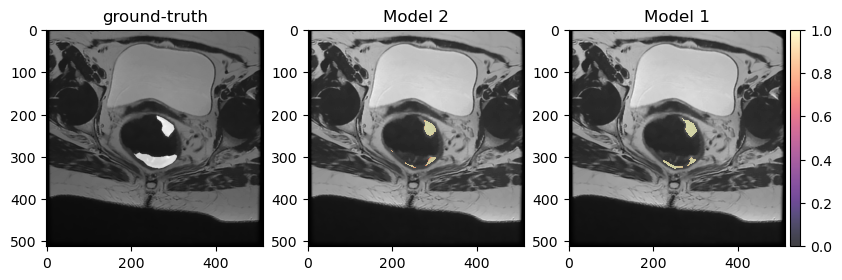

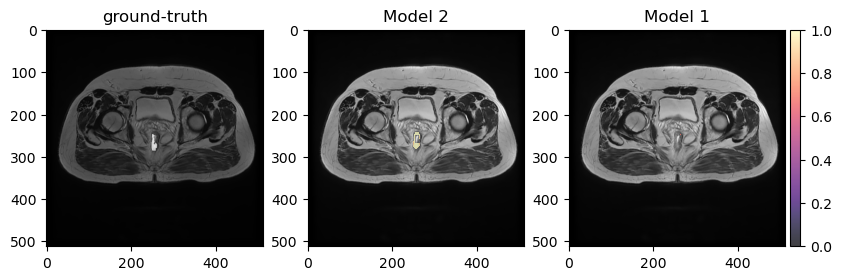

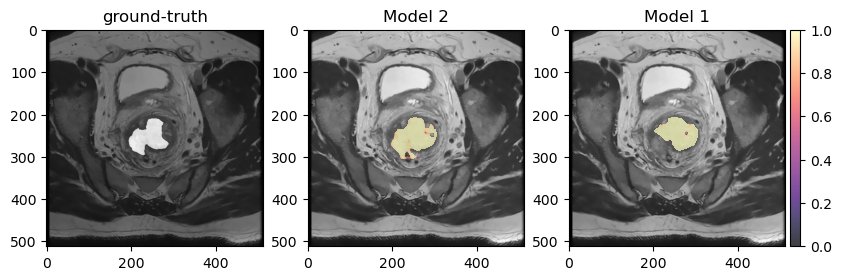

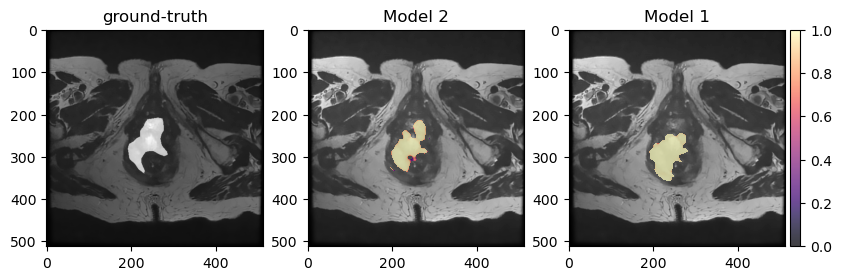

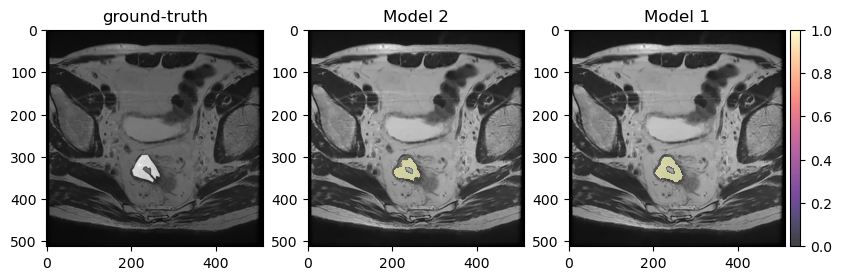

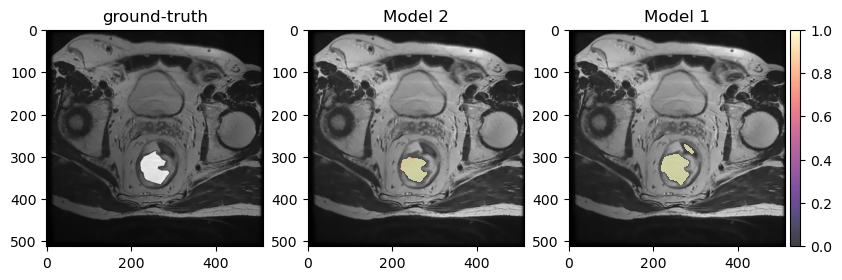

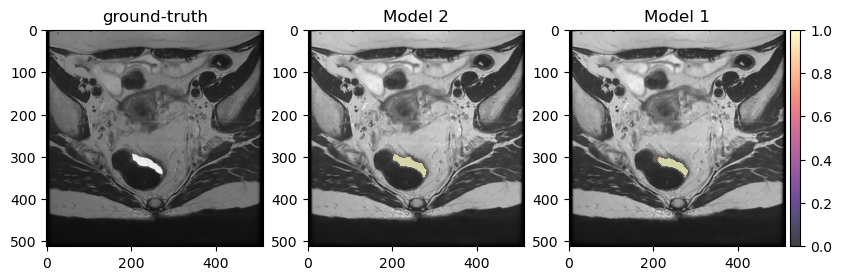

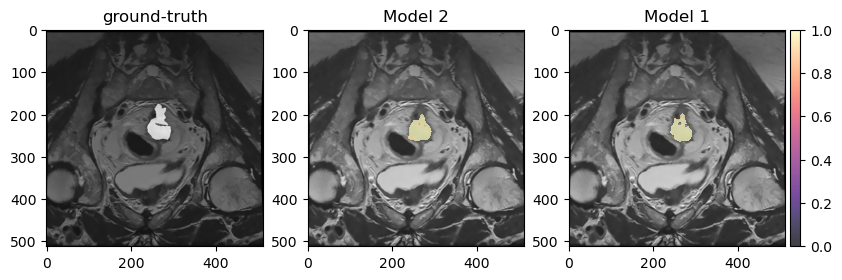

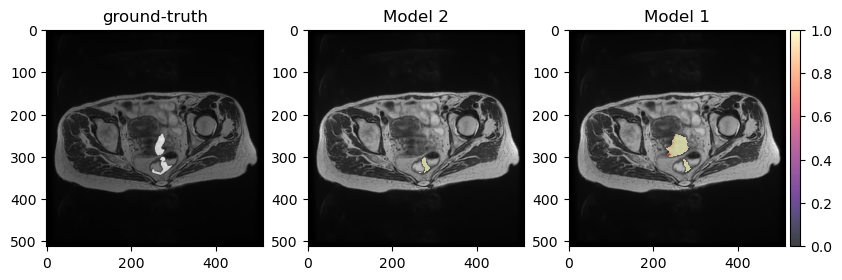

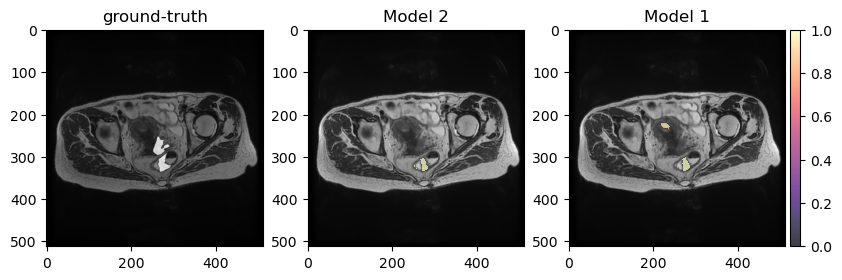

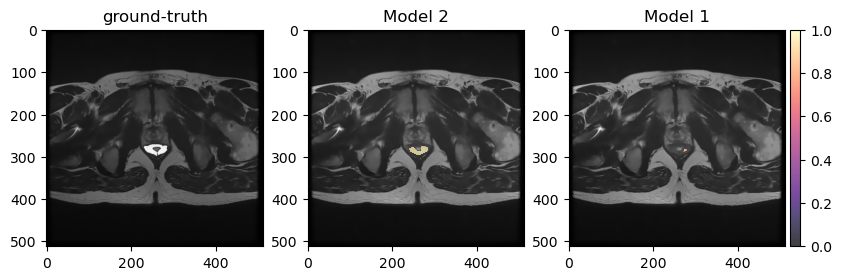

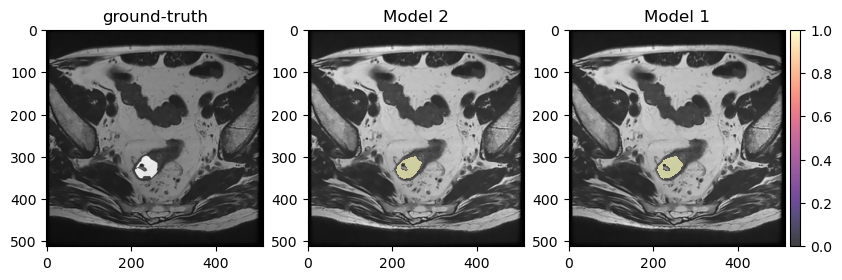

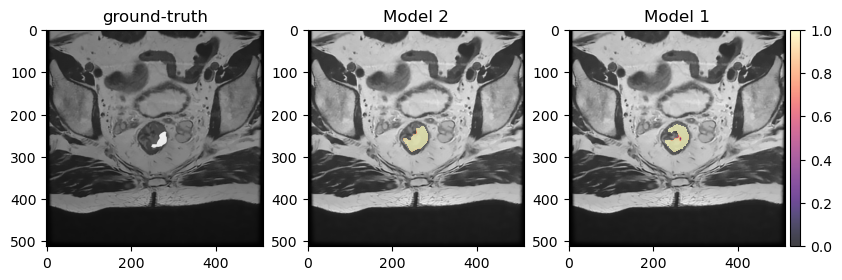

In [11]:
show_multiple_overlap(Generator_validation, keys, values, 30, cmap='magma', figsize=(10,10))